In [1]:
! nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [2]:
!git clone https://github.com/nanekja/pytorch_utils

Cloning into 'pytorch_utils'...
remote: Enumerating objects: 55, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 55 (delta 27), reused 39 (delta 13), pack-reused 0
Receiving objects: 100% (55/55), 11.24 KiB | 11.24 MiB/s, done.
Resolving deltas: 100% (27/27), done.


In [3]:
import sys 
#sys.path.append('/content/pytorch_utils')
sys.path.append('./pytorch_utils/')

In [4]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms

!pip install torchsummary

!pip install tqdm

from tqdm import tqdm
from torchsummary import summary
import sys
import os
%matplotlib inline
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import StepLR

!pip install albumentations
import albumentations as A
from albumentations.pytorch import ToTensorV2

import main
import utils
import transform
import model
import train1
import test1
import dataloader
import albumentation


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [5]:
device = utils.get_device()
print(device)

cpu


In [6]:
# loading the dataset
exp = torchvision.datasets.CIFAR10('./data', train=True, download=True)
exp_data = exp.data
mean, std = utils.get_mean_and_std(exp_data)
exp.data.shape # train data shape

Files already downloaded and verified
 - Dataset Numpy Shape: (50000, 32, 32, 3)
 - Min: [0. 0. 0.]
 - Max: [1. 1. 1.]
 - Mean: [0.49139968 0.48215841 0.44653091]
 - Std: [0.24703223 0.24348513 0.26158784]
 - Var: [15.56135559 15.11767693 17.44919073]


(50000, 32, 32, 3)

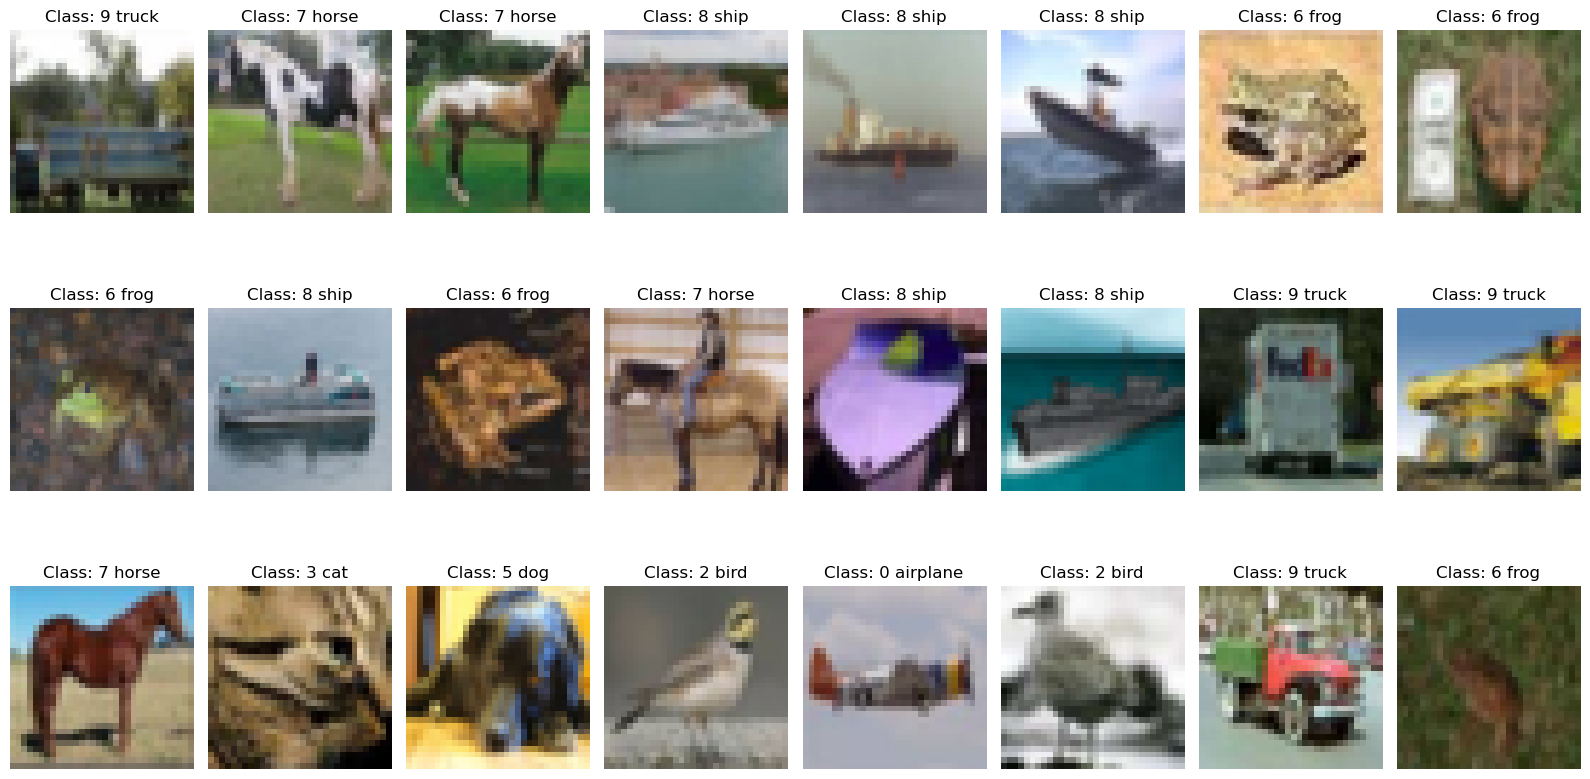

In [7]:
utils.plot_data(exp,3,8)

In [8]:
dataiter = iter(transform.train_loader)

images, labels = next(dataiter)
print(images.shape)
print(labels.shape)

# show images
utils.imshow(torchvision.utils.make_grid(images))


NameError: name 'transform' is not defined

In [ ]:
from model import Net
model = Net().to(device)

!pip install torchscan --no-deps
from torchscan import summary

#summary(model, (3, 32, 32), receptive_field=True, max_depth=1)

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=1, gamma=0.1)

EPOCHS = 2

net, history = main.fit_model(model, device, transform.train_loader, transform.test_loader, optimizer, scheduler, EPOCHS)

EPOCH: 1 (LR: 0.01)


Batch_id=438 Loss=2.30210 Accuracy=10.08:  28%|██▊       | 439/1563 [00:43<01:50, 10.19it/s]


KeyboardInterrupt: 

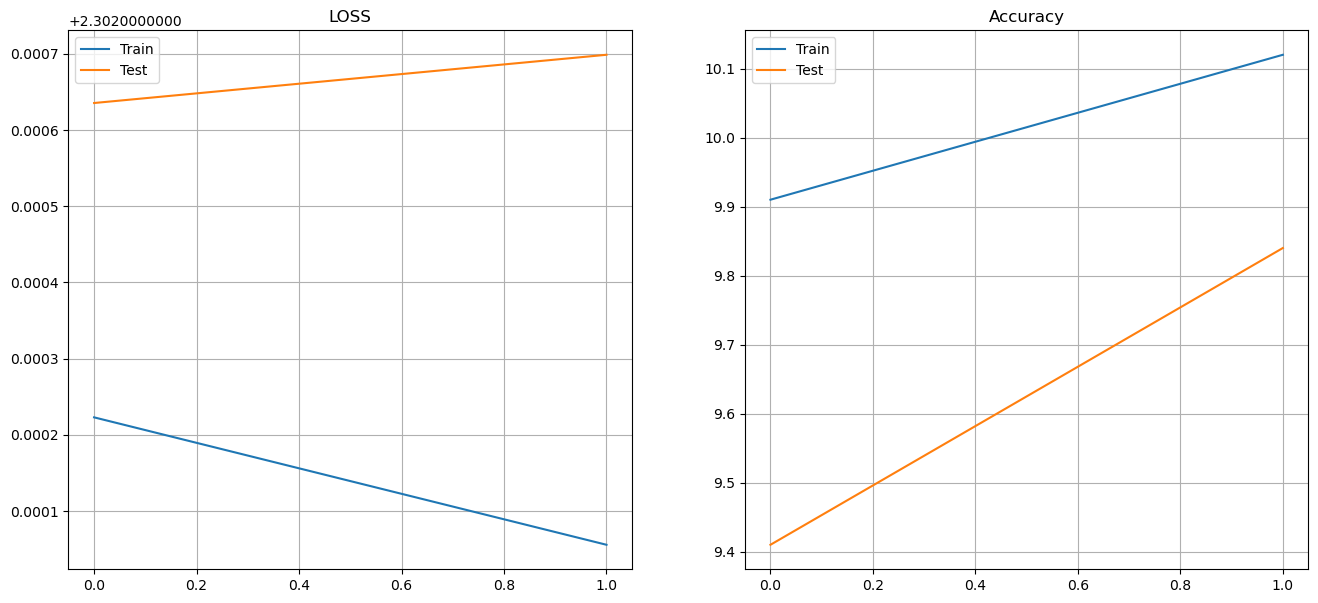

In [ ]:
utils.result_graphs(history)

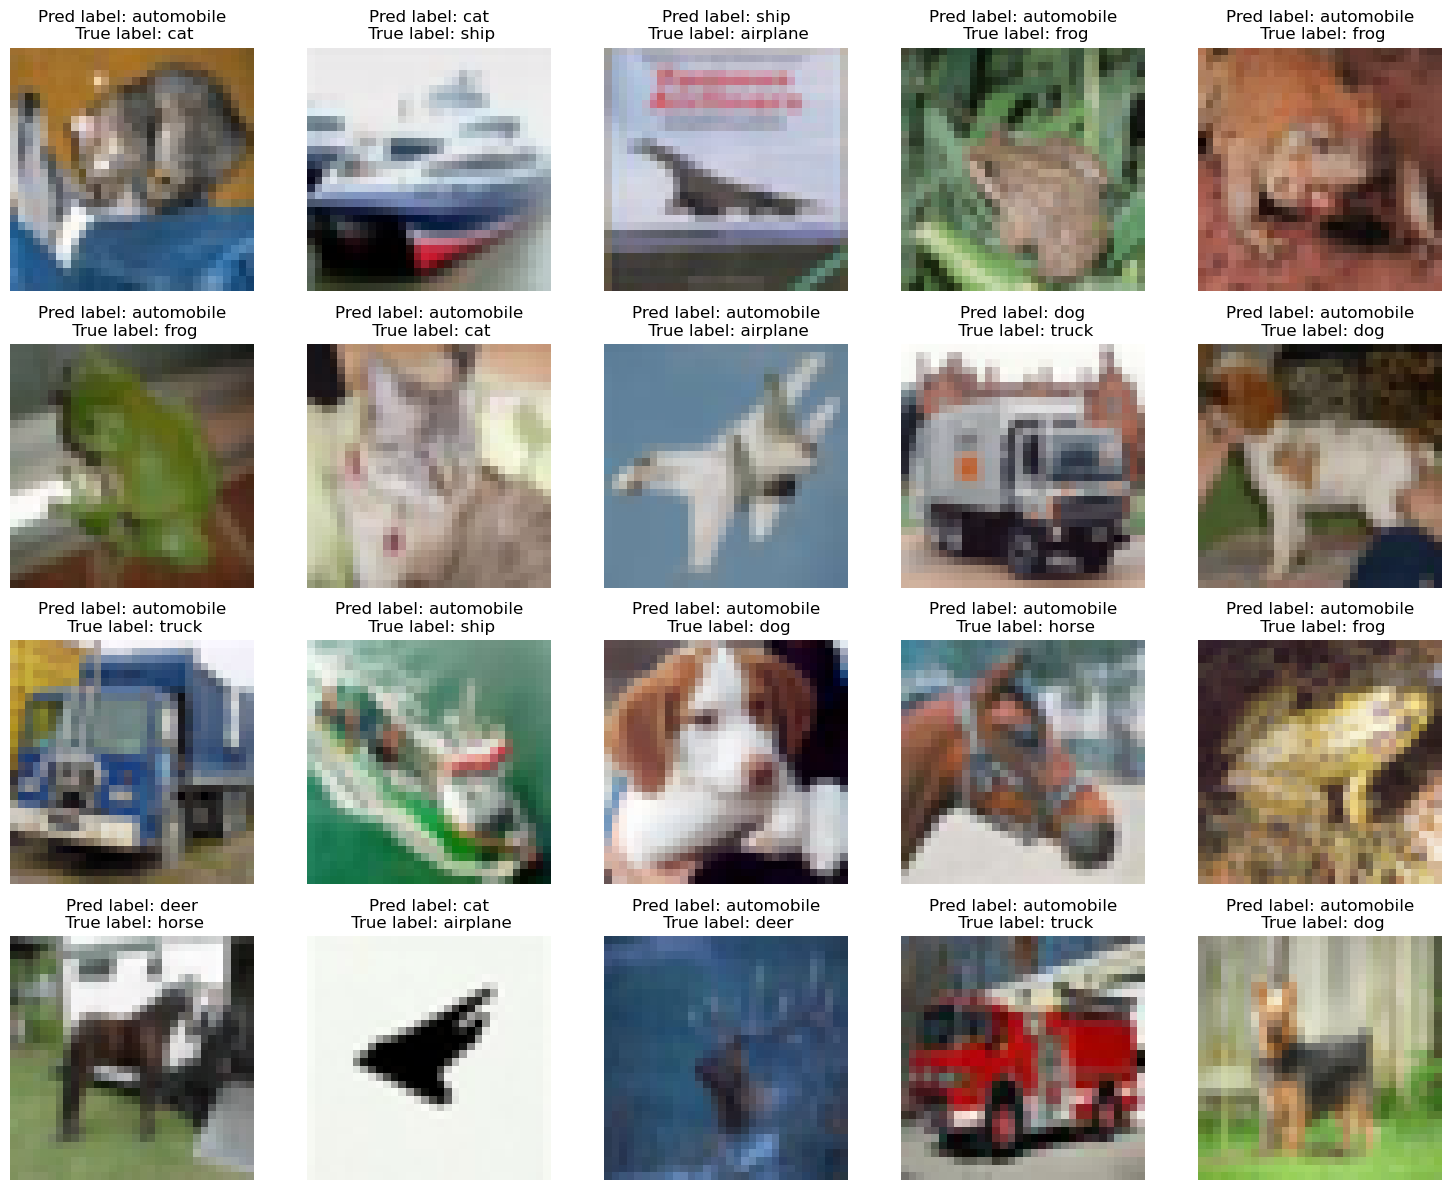

In [ ]:
#classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
misclf = utils.plot_misclassified(net, test_loader, testset.classes, device, mean, std, return_misclf=True)

In [ ]:
# we will save the conv layer weights in this list
model_weights =[]
#we will save the 49 conv layers in this list
conv_layers = []
# get all the model children as list
model_children = list(model.children())
#counter to keep count of the conv layers
counter = 0
#append all the conv layers and their respective wights to the list

model_children = model.children()
for children in model_children:
    if type(children) == nn.Sequential:
        for child in children:
            if type(child) == nn.Conv2d:
                counter += 1
                model_weights.append(child.weight)
                conv_layers.append(child)

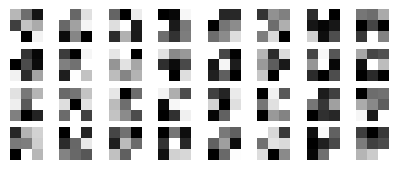

In [ ]:
# visualize the first conv layer filters
plt.figure(figsize=(5, 4))
first_layer_weights = model_weights[0].cpu()
for i, filter in enumerate(first_layer_weights):
    plt.subplot(8, 8, i+1) # (8, 8) because in conv0 we have 7x7 filters and total of 64 (see printed shapes)
    plt.imshow(filter[0, :, :].detach(), cmap='gray')
    plt.axis('off')
plt.show()